<span style="color:#ff6200; ">Section: 5.1.1</span>

<span style="color:#ff6200;">Exercise 5.1</span>

In [472]:
import numpy as np
matcov = np.array([[0.2, -0.1],
                  [-0.1, 0.5]])
matcovinv = (10 / 9) * np.array([[5, 1],
                                [1, 2]])
ones = np.array([1, 1])
mu1, mu2 = 0.1, 0.4
sig1sq, sig2sq = 0.2, 0.5
mus = np.array([mu1, mu2])
rf = 0.02

portf = (ones.T @ matcovinv) * (ones.T @ matcovinv @ ones)**-1

exp_min = portf @ mus
vol_min = portf @ matcov @ portf.T

max_sharp = (mus - rf * ones).T @ matcovinv * ((mus - rf * ones).T @ matcovinv @ ones)**-1

exp_sharp = max_sharp @ mus
vol_sharp = max_sharp @ matcov @ max_sharp.T

muv = 0.225
from sympy import symbols, solve

s = symbols('s')
expr = (1 - s) * mu1 + s * mu2 - muv
portf_new = solve(expr)

# value 10 is not correct here!
# what is the covariance of the tangent and the minimum variance portfolio ? 
def effportf(s):
    return (
        s**2 * vol_min**2 + 2 * s * (1 - s) * 10 + (1 - s)**2 * vol_sharp**2,
        s * exp_min + (1 - s) * exp_sharp
    )


_<span style="color:#ff6200;">Answer:</span>_

[0.66666667 0.33333333], 0.2, 0.1
[0.48148148 0.51851852], 0.2555555555555556, 0.13086419753086423
0.416666666666667, 0.583333333333333


Text(0, 0.5, '$E[R]$')

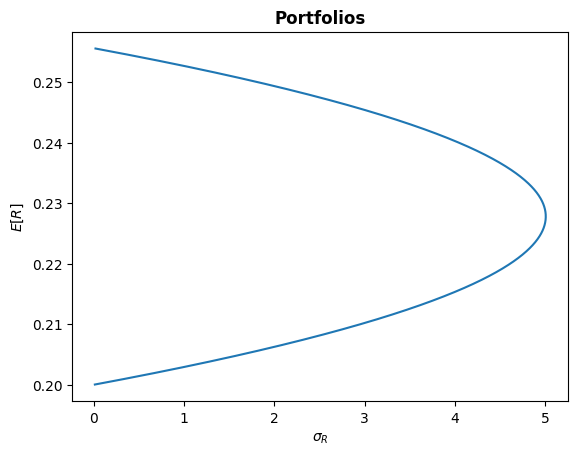

In [473]:
print(f'{portf}, {exp_min}, {vol_min}')
print(f'{max_sharp}, {exp_sharp}, {vol_sharp}')
print(f'{portf_new[0]}, {1 - portf_new[0]}')

import matplotlib.pyplot as plt

sList = np.linspace(0, 1, num=1000)
portfs = [effportf(s) for s in sList]
stds =  [portf[0] for portf in portfs]
means = [portf[1] for portf in portfs]
plt.plot(stds, means)
plt.title('Portfolios', weight='bold')
plt.xlabel('$\sigma_{R}$')
plt.ylabel('$E[R]$')

<span style="color:#ff6200;">Exercise 5.2</span>

In [474]:
from sympy import symbols, solve, diff
s, u1, u2, sig1sq, sig2sq, cov12, rf = symbols('s u1 u2 sig1sq sig2sq cov12 rf')
mus = s * u1 + (1 - s) * u2
sig = s**2 * sig1sq + 2 * s * (1 - s) * cov12 + (1 - s)**2 * sig2sq
hs = (mus - rf) - 0.5 * sig
hsdiff = diff(hs, s)
solutions = solve(hsdiff, s)

_<span style="color:#ff6200;">Answer:</span>_

In [475]:
solutions

[(-cov12 + sig2sq + u1 - u2)/(-2.0*cov12 + sig1sq + sig2sq)]

<span style="color:#ff6200;">Exercise 5.3</span>

In [476]:
rf = 0.02
sigM = 0.3
muM = 0.17

def cmlportf(sig):
    return (
        sig,
        rf + (muM - rf) * sig * sigM**-1
    )

_<span style="color:#ff6200;">Answer:</span>_

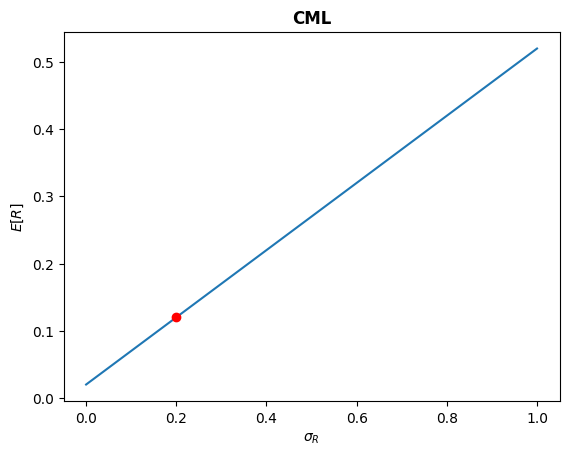

In [477]:
import matplotlib.pyplot as plt
sigList = np.linspace(0, 1, num=10000)
portfs = [cmlportf(sig) for sig in sList]
stds =  [portf[0] for portf in portfs]
means = [portf[1] for portf in portfs]
plt.plot(stds, means)
plt.title('CML', weight='bold')
plt.xlabel('$\sigma_{R}$')
plt.ylabel('$E[R]$')
plt.plot(0.2, 0.12, 'ro')
plt.show()
# on the Capital Market Line

<span style="color:#ff6200;">Exercise 5.4</span>

In [478]:
import numpy as np
from sympy import symbols, solve

s = 0.5
sig1, sig2 = 0.2, 0.4
corr1 = 0
corr2 = -0.5
vol1 = s**2 * sig1**2 + 2 * s * \
    (1 - s) * corr1 * sig1 * sig2 + (1 - s)**2 * sig2**2
vol2 = s**2 * sig1**2 + 2 * s * \
    (1 - s) * corr2 * sig1 * sig2 + (1 - s)**2 * sig2**2

mus = np.array([0.5, 0.6])

muFirst = np.array([s, 1 - s]) @ mus

ones = np.array([1, 1])
rf = 0.08


matcovinv = (25 / 3) * np.array([[4, 1],
                                 [1, 1]])

matcov = np.array([[0.04, -0.04],
                   [-0.04, 0.16]])

portf = (mus - rf * ones).T @ matcovinv * \
    ((mus - rf * ones).T @ matcovinv @ ones)**-1
exp = portf @ mus
vol = portf @ matcov @ portf.T


s = symbols('s')
mu = rf + (exp - rf) * portf[0] * vol * vol**-1
eq = rf + (exp - rf) * s * vol * vol**-1
sig = portf[0] * vol
diff = mu - muFirst
solution = solve(muFirst - eq, s)[0]

_<span style="color:#ff6200;">Answer:</span>_

In [479]:
print(f'{muFirst}')
print(f'{vol1}, {vol2}')
print(f'{portf}, {exp}, {vol}')
print(f'{mu}, {sig}')
print(f'{diff * 100} %')
print(f'{solution}')

0.55
0.05000000000000001, 0.030000000000000006
[0.70063694 0.29936306], 0.529936305732484, 0.017195018053470727
0.3952419976469633, 0.012047464878227897
-15.475800235303677 %
1.04459229898075


<span style="color:#ff6200;">Exercise 5.5</span>

In [480]:
mmu = 0.23
tbills = 0.07
msig = 0.32
s = symbols('s')
mu = tbills + (mmu - tbills) * s

def capm(s):
    return (
        msig * s,
        mu
    )

mu_desired = 0.39
solutions = solve(mu_desired - mu, s)

print(solutions[0] * msig)

# what are the weights of the portfolio
w = symbols('w')
solutions = solve(mu_desired - w * tbills - (1 - w) * mmu, w)

print(solutions)
# 1000 to invest in bills and 2000 to invest in portfolio


0.640000000000000
[-1.00000000000000]


_<span style="color:#ff6200;">Answer:</span>_

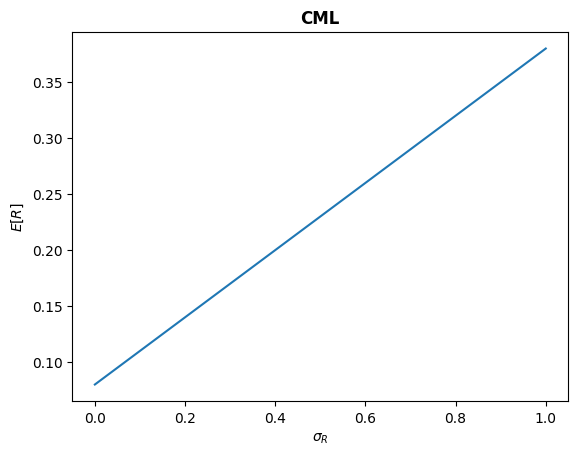

In [481]:
import matplotlib.pyplot as plt
sList = np.linspace(0, 1, num=10000)
portfs = [cmlportf(s) for s in sList]
stds =  [portf[0] for portf in portfs]
means = [portf[1] for portf in portfs]
plt.plot(stds, means)
plt.title('CML', weight='bold')
plt.xlabel('$\sigma_{R}$')
plt.ylabel('$E[R]$')
plt.show()
# on the Capital Market Line

In [482]:
mu1, mu2, mu3 = 0.1, 0.2, 0.1 
mus = np.array([mu1, mu2, mu3])
w = np.array([0.6, 0.2, 0.2])
v = np.array([0.8, -0.2, 0.4])
muw = w @ mus
muv = v @ mus

# 2 fund theorem needs to be used here

In [483]:
print(f'{muw}, {muv}')

0.12000000000000001, 0.08000000000000002


<span style="color:#ff6200;">Exercise 5.6</span>

In [484]:
s = 0.5
rf = 0.1
sigAsq, sigBsq, corrAB = 0.04, 0.02, 0.1
retM = 0.18
sigMsq = 0.25 * sigAsq + 2 * corrAB + 0.25 * sigBsq
# Cov(A, M) and Cov(B, M) needs to be calculated
# compute beta_{A} = Cov(A, M) / sigMsq & beta_{B} = Cov(B, M) / sigMsq

_<span style="color:#ff6200;">Answer:</span>_

<span style="color:#ff6200; ">Section: 6.1.1</span>

<span style="color:#ff6200;">Exercise 6.1</span>

_<span style="color:#ff6200;">Answer:</span>_

In [485]:
# P[X > 0.13] : X ~ N(0.1, 0.04)
# <=> P[Z > (0.13 - 0.1) / 0.04] <=> 1 - P[Z <= (0.13 - 0.1) / 0.04]

# P[0.09 < X < 0.11] : X ~ N(0.1, 0.04)
# <=> P[X < 0.11] - P[X < 0.09] 
# <=> P[Z < (0.11 - 0.1) / 0.4] - P[Z < (0.09 - 0.1) / 0.04]

<span style="color:#ff6200;">Exercise 6.2</span>

_<span style="color:#ff6200;">Answer:</span>_

In [486]:
# P[X < z] = 0.25 : X ~ N(0, 1)
# P[ Z < z] = 0.25, find z such that phi(z) yields 0.25

<span style="color:#ff6200;">Exercise 6.3</span>

_<span style="color:#ff6200;">Answer:</span>_

In [487]:
# if you take any population, draw samples from it and compute the means of those samples, 
# then repetition of this experiment would yield a normally distributed probability density
# function according to the Central Limit Theorem

<span style="color:#ff6200; ">Section: 7.1.1</span>

<span style="color:#ff6200;">Exercise 7.1</span>

In [488]:
mum, mu1, mu2 = 0.07, 0.12, 0.07
smvar, s1var, s2var = 0.1, 0.5, 0.4 
p12 = 0
rf = 0.01
b1, b2 = 0.4, 0.6
w1, w2, wm = 0.2, 0.3, 0.5

srsm = (mum - rf) / smvar**0.5
srs1 = (mu1 - rf) / s1var**0.5
srs2 = (mu2 - rf) / s2var**0.5

print(f'{srsm}, {srs1}, {srs2}')

cov12 = p12
cov2m = b2 * smvar
cov1m = b1 * smvar

print(f'{cov12}, {cov2m}, {cov1m}')

matcov = np.array(
    [
        [s1var, cov12, cov1m],
        [cov12, s2var, cov2m],
        [cov1m, cov2m, smvar]
    ]
)

print(matcov)

wA, wB = np.array([w1, w2, wm]), np.array([0, 0, 1])
mus = np.array([mu1, mu2, mum])
Pr = ( (wA - wB).T @ mus - 0.5 * (wA - wB).T @ matcov @ (wA - wB) ) * ( (wA - wB).T @ matcov @ (wA - wB) )**-1

# this value is incorrect according to the marscheme, warren buffet is confused !? |===|)
print(Pr)

from scipy.stats import norm

t = 0.5
x = (Pr * t**0.5)
prob = norm.cdf(x)


0.18973665961010278, 0.15556349186104046, 0.09486832980505139
0, 0.06, 0.04000000000000001
[[0.5  0.   0.04]
 [0.   0.4  0.06]
 [0.04 0.06 0.1 ]]
-0.31818181818181823


_<span style="color:#ff6200;">Answer:</span>_

In [489]:
print(prob)

0.41099410202122166


<span style="color:#ff6200;">Exercise 7.2</span>

In [490]:
drift, vol = 0.12, 0.2
dt = 0.25
p = 0.5 + 0.5 * drift * vol**-1 * dt**0.5
u = np.e**(vol * dt**0.5)
d = u**-1

print(p, u, d)

0.65 1.1051709180756477 0.9048374180359595


_<span style="color:#ff6200;">Answer:</span>_

In [491]:
print(p, u, d)

0.65 1.1051709180756477 0.9048374180359595


<span style="color:#ff6200;">Exercise 7.3</span>

In [492]:
S0 = 100
drift, vol = 0.05, 0.25
dt = 1
p = 0.5 + 0.5 * drift * vol**-1 * dt**0.5
u = np.e**(vol * dt**0.5)
d = u**-1

exp = p * S0 * u + (1 - p) * S0 * d
var = (S0 * u - exp)**2 * p + (S0 * d - exp)**2 * (1 - p)

In [493]:
print(exp, var)

108.19355632412069 612.6046329906276


<span style="color:#ff6200;">Exercise 7.4</span>

In [494]:
S0 = 100
u, d = 1.25, 0.75 # u**-1
p = 0.6025

# Algorithm to construct binomial lattice
#   numP: number of periods
#   u : up factor
#   d : down factor
def binomt(numP, u, d):
    whole = [
        [S0]
    ]
    t = 1
    while t <= numP:
        now = whole[-1]
        nxt = []
        for i in range(len(now)):
            nxt.append(
               now[i] * u 
            )
            nxt.append(
                now[i] * d
            )
        whole.append(nxt)
        t += 1           
    return whole

#   creates new line per layer
#   arr : tree to render
def bindomrender(arr):
    for now in arr:
        print(now)

result = binomt(2, u, d)
rendered = bindomrender(result)
rendered

def backtr(arr, pos, rec):
    
    if pos == len(arr) - 1:
        print(rec)
        rec.append(arr)
        return rec
    
    for s in ['p', 'q']:
        arr[pos + 1] = s
        rec = backtr(arr, pos + 1, rec)
        arr[pos + 1] = ''

    return rec

res = backtr(
    ['' for i in range(3)],
    -1, 
    []
)
print(res)

[100]
[125.0, 75.0]
[156.25, 93.75, 93.75, 56.25]
[]
[['p', 'p', 'q']]
[['p', 'q', 'p'], ['p', 'q', 'p']]
[['p', 'q', 'q'], ['p', 'q', 'q'], ['p', 'q', 'q']]
[['q', 'p', 'p'], ['q', 'p', 'p'], ['q', 'p', 'p'], ['q', 'p', 'p']]
[['q', 'p', 'q'], ['q', 'p', 'q'], ['q', 'p', 'q'], ['q', 'p', 'q'], ['q', 'p', 'q']]
[['q', 'q', 'p'], ['q', 'q', 'p'], ['q', 'q', 'p'], ['q', 'q', 'p'], ['q', 'q', 'p'], ['q', 'q', 'p']]
[['q', 'q', 'q'], ['q', 'q', 'q'], ['q', 'q', 'q'], ['q', 'q', 'q'], ['q', 'q', 'q'], ['q', 'q', 'q'], ['q', 'q', 'q']]
[['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', '']]
